# Notebook 2: Geophysical Fluid Dynamics Basics  
### Assignment 1 - Atmospheric Dynamics and Aerosol Science

**Course:** RSG 5013 Aerosol Remote Sensing and Atmospheric Dynamics Practical  
**Instructor:** Dr. Arjun Adhikari  
**Student Name:** TRUPTI DNYANESHWAR SUTAR

**PR No.:** 202204978

---

## Learning Objectives

By completing this notebook, you will:

- Understand the Coriolis parameter and its dependence on latitude  
- Explore geostrophic balance and geostrophic wind  
- Compute and interpret Rossby number for typical atmospheric flows  
- Visualise simple inertial oscillations  
- Connect large scale flow to aerosol and pollutant transport  

> Recommended: Complete Notebook 1 before attempting this notebook.

---

## Instructions

1. Run all code cells in order from top to bottom.  
2. Answer the conceptual questions in the Markdown cells provided.  
3. Do not delete any existing cells. You may add new cells if needed.  
4. Use clear units and axis labels in all plots.  
5. Commit and push your work regularly.


In [1]:
# Imports and basic definitions for geophysical fluid dynamics

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Physical constants
Omega = 7.2921e-5   # Earth's rotation rate [rad s^-1]
Re    = 6.371e6     # Earth's mean radius [m]

print("Constants loaded. Omega = {:.4e} rad/s".format(Omega))


Constants loaded. Omega = 7.2921e-05 rad/s


## Q1. Coriolis Parameter

The Coriolis parameter is defined as

\[
f = 2 \Omega \sin(\varphi)
\]

where:

- \( \Omega \) is Earth's rotation rate  
- \( \varphi \) is latitude (positive in the Northern Hemisphere)  

### Tasks

1. In words (3-4 sentences), explain the physical meaning of the Coriolis force.  
2. What is the value of \( f \) at the equator, and why?  
3. Is \( f \) positive or negative in:
   - Northern Hemisphere  
   - Southern Hemisphere  

Write your answers below.

1.The Coriolis force is an apparent force caused by Earth’s rotation. It makes moving air and objects appear to curve rather than move in a straight line over Earth’s surface. The force acts at right angles to the direction of motion and becomes stronger at higher latitudes. It is important for explaining large-scale wind patterns and rotating weather systems.

2.At the equator ,f=0 because the sine of latitude is zero, so there is no Coriolis effect there.

3. Northern Hemisphere: Positive

Southern Hemisphere: Negative

Latitude -60 deg: f = -1.263e-04 s^-1
Latitude -30 deg: f = -7.292e-05 s^-1
Latitude   0 deg: f = 0.000e+00 s^-1
Latitude  30 deg: f = 7.292e-05 s^-1
Latitude  60 deg: f = 1.263e-04 s^-1


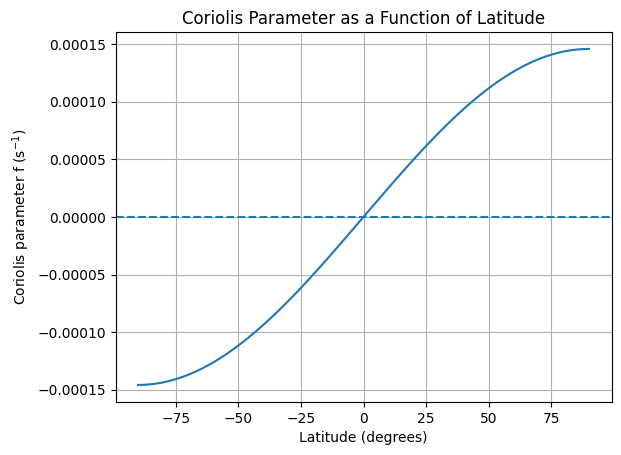

In [2]:
# Q1(b). Coriolis parameter as a function of latitude

# Define latitudes from -90 to +90 degrees
lat_deg = np.linspace(-90, 90, 181)
lat_rad = np.deg2rad(lat_deg)

# Compute Coriolis parameter f
f = 2 * Omega * np.sin(lat_rad)

# Print some reference values
for phi in [-60, -30, 0, 30, 60]:
    fr = 2 * Omega * np.sin(np.deg2rad(phi))
    print("Latitude {:>3d} deg: f = {:.3e} s^-1".format(phi, fr))

# Plot f versus latitude
plt.figure()
plt.plot(lat_deg, f)
plt.axhline(0.0, linestyle='--')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Coriolis parameter f (s$^{-1}$)")
plt.title("Coriolis Parameter as a Function of Latitude")
plt.grid(True)
plt.show()


### Q1(c). Interpretation

Using the printed values and the plot above:

1. How does the magnitude of \( f \) change from equator to poles?  
2. Why is the Coriolis effect often neglected near the equator for some phenomena?  
3. In 3–4 sentences, comment on how this variation in \( f \) might influence large scale atmospheric circulation.

Write your answer here.

1.The magnitude of f is zero at the equator and increases steadily toward the poles. It reaches its largest values at high latitudes.

2.Near the equator, f is very small, so the Coriolis force is weak compared to other forces. This means air motion is only weakly deflected and the effect can often be ignored

3.Because f increases with latitude, the Coriolis force has a stronger influence on winds away from the equator. In mid and high latitudes, this allows rotating, balanced flows such as jet streams and cyclones to form. Near the equator, the weak Coriolis force allows air to move more directly, supporting strong rising motion and overturning circulations. This difference helps shape Earth’s global circulation patterns

## Q2. Geostrophic Balance

In large scale, slowly varying mid latitude flows away from the equator, the horizontal momentum equations can be approximated by **geostrophic balance**:

\[
f v_g = \frac{1}{\rho} \frac{\partial p}{\partial x}, \qquad
f u_g = -\frac{1}{\rho} \frac{\partial p}{\partial y}
\]

where:

- \( (u_g, v_g) \) are the geostrophic wind components  
- \( p \) is pressure, \( \rho \) is air density  

### Tasks

1. In 3-4 sentences, explain the assumptions under which geostrophic balance holds.  
2. What is the physical meaning of geostrophic wind?  
3. Why is geostrophic balance a good approximation for synoptic scale mid latitude flows?

Write your answers below.

1.Geostrophic balance applies to large-scale atmospheric motions that change slowly with time. The flow is assumed to be far from the equator so the Coriolis force is significant and approximately constant. Friction and acceleration are neglected, meaning the flow is steady and not rapidly evolving. Under these conditions, the pressure gradient force is balanced by the Coriolis force.

2.The geostrophic wind is the idealized wind that results when the pressure gradient force is exactly balanced by the Coriolis force. It flows parallel to isobars rather than directly from high to low pressure.

3.Synoptic-scale systems are large and evolve slowly, making acceleration and friction relatively small. At mid latitudes, the Coriolis force is strong enough to balance pressure gradients. As a result, geostrophic balance provides a good first-order description of the wind in these regions.


In [3]:
# Q2(b). Simple geostrophic wind calculation

# Assume a mid-latitude, constant density, simple pressure field:
# p(x, y) = p0 - G * y
# so that dp/dy = -G (constant), dp/dx = 0

rho = 1.25     # kg m^-3, representative air density
G   = 0.5      # Pa per km in y-direction (we will convert to SI units)

# Convert G from Pa/km to Pa/m
G_SI = G / 1000.0

# Choose a fixed latitude, say 45N
lat0_deg = 45.0
lat0_rad = np.deg2rad(lat0_deg)
f0 = 2 * Omega * np.sin(lat0_rad)

print("Latitude = {:.1f} deg, f0 = {:.3e} s^-1".format(lat0_deg, f0))

# Geostrophic wind components:
# f u_g = -(1/rho) dp/dy = (1/rho) G_SI  (because dp/dy = -G_SI)
# f v_g = (1/rho) dp/dx = 0  (because dp/dx = 0)

u_g = (1.0 / rho) * G_SI / f0   # m/s
v_g = 0.0

print("Geostrophic wind components at 45N:")
print("u_g = {:.2f} m/s (positive eastward)".format(u_g))
print("v_g = {:.2f} m/s (positive northward)".format(v_g))


Latitude = 45.0 deg, f0 = 1.031e-04 s^-1
Geostrophic wind components at 45N:
u_g = 3.88 m/s (positive eastward)
v_g = 0.00 m/s (positive northward)


### Q2(c). Direction of Geostrophic Wind

1. In the simple example above, pressure decreases towards positive y.  
   - In the Northern Hemisphere, is the geostrophic wind blowing with low pressure on its left or on its right?  
2. How would the direction change in the Southern Hemisphere (sign of \( f \))?  
3. In your own words (3-4 sentences), explain why geostrophic winds tend to flow **along** isobars rather than directly from high to low pressure.

Write your answer here.

1.In the Northern Hemisphere, the geostrophic wind blows with low pressure on its left

2.In the Southern Hemisphere, where f is negative, the geostrophic wind direction reverses so that low pressure is on the right of the wind direction.

3.Geostrophic winds flow along isobars because the Coriolis force acts perpendicular to the wind direction, balancing the pressure gradient force that pushes air from high to low pressure. If the wind blew directly toward low pressure, it would accelerate, but the Coriolis force deflects it sideways, resulting in a steady flow parallel to the pressure lines. This balance keeps the wind from crossing isobars, leading to the characteristic curved flow around pressure systems.


In [4]:
# Q3. Rossby Number

# Rossby number Ro = U / (f * L)

def rossby_number(U, L, lat_deg):
    """Compute Rossby number for given velocity U [m/s],
    length scale L [m], and latitude lat_deg [degrees]."""
    phi = np.deg2rad(lat_deg)
    f_loc = 2 * Omega * np.sin(phi)
    return U / (f_loc * L)

# Example flows
U_values    = [5.0, 10.0, 20.0]          # m/s
L_values_km = [50.0, 500.0, 2000.0]      # km
latitudes   = [10.0, 30.0, 60.0]         # degrees

print("Rossby numbers for various flows:")
for lat in latitudes:
    for L_km in L_values_km:
        for U in U_values:
            L = L_km * 1000.0
            Ro = rossby_number(U, L, lat)
            print("lat = {:>4.0f} deg, U = {:>4.1f} m/s, L = {:>5.0f} km -> Ro = {:.2f}".format(
                lat, U, L_km, Ro))
    print("-" * 60)


Rossby numbers for various flows:
lat =   10 deg, U =  5.0 m/s, L =    50 km -> Ro = 3.95
lat =   10 deg, U = 10.0 m/s, L =    50 km -> Ro = 7.90
lat =   10 deg, U = 20.0 m/s, L =    50 km -> Ro = 15.79
lat =   10 deg, U =  5.0 m/s, L =   500 km -> Ro = 0.39
lat =   10 deg, U = 10.0 m/s, L =   500 km -> Ro = 0.79
lat =   10 deg, U = 20.0 m/s, L =   500 km -> Ro = 1.58
lat =   10 deg, U =  5.0 m/s, L =  2000 km -> Ro = 0.10
lat =   10 deg, U = 10.0 m/s, L =  2000 km -> Ro = 0.20
lat =   10 deg, U = 20.0 m/s, L =  2000 km -> Ro = 0.39
------------------------------------------------------------
lat =   30 deg, U =  5.0 m/s, L =    50 km -> Ro = 1.37
lat =   30 deg, U = 10.0 m/s, L =    50 km -> Ro = 2.74
lat =   30 deg, U = 20.0 m/s, L =    50 km -> Ro = 5.49
lat =   30 deg, U =  5.0 m/s, L =   500 km -> Ro = 0.14
lat =   30 deg, U = 10.0 m/s, L =   500 km -> Ro = 0.27
lat =   30 deg, U = 20.0 m/s, L =   500 km -> Ro = 0.55
lat =   30 deg, U =  5.0 m/s, L =  2000 km -> Ro = 0.03
lat =   

### Q3(b). Interpretation of Rossby Number

Using the printed values above:

1. Identify one example where \( \text{Ro} \ll 1 \). What does this imply about the importance of rotation and the validity of geostrophic balance?  
2. Identify one example where \( \text{Ro} \sim 1 \) or larger. What does this imply about the flow (for example, convection or small scale turbulence)?  
3. In 3-4 sentences, explain why large scale mid latitude weather systems often have small Rossby numbers.

Write your answer below.

1.Example where Ro≪1
Ro≪1:For 𝑈=5m/s,𝐿=2000km,lat=60∘ U=5m/s,L=2000km,lat=60∘, the Rossby number is much less than 1. This means the Coriolis force dominates over inertial forces, so rotation strongly influences the flow and geostrophic balance is a good approximation.

2.for u=20
m/s
,

𝐿
=
50

km
,

lat
=
10
∘
U=20m/s,L=50km,lat=10
∘
, the Rossby number is around 1 or higher. In this case, inertial forces are comparable to or stronger than the Coriolis force, so rotation is less important and the flow may be dominated by convection or small-scale turbulence.

3.Large-scale mid-latitude weather systems, like cyclones and anticyclones, have large horizontal scales (hundreds to thousands of kilometers) and relatively moderate wind speeds. This results in small Rossby numbers, meaning the Coriolis force strongly influences the flow. Because rotation dominates, the winds tend to align with pressure gradients, making geostrophic balance a valid approximation for these systems. Small Rossby numbers also explain why these large systems rotate and evolve slowly compared to smaller, rapidly changing flows.


Latitude = 30.0 deg, f = 7.292e-05 s^-1
Inertial period T ≈ 23.9 hours


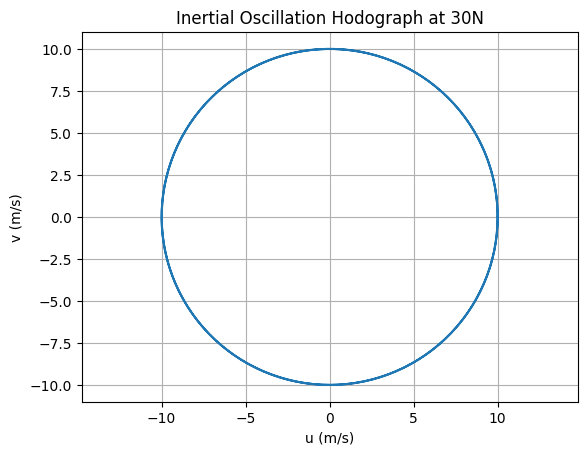

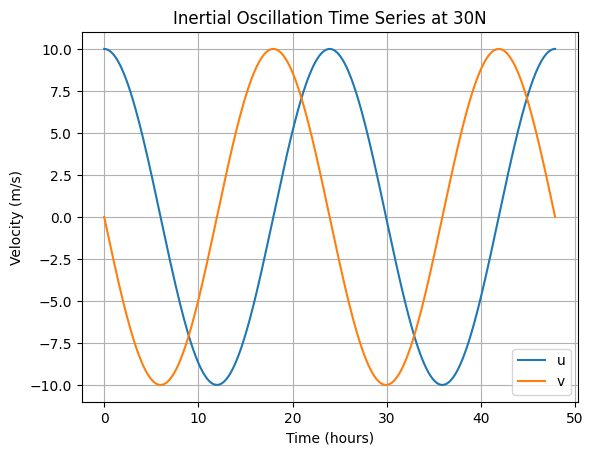

In [5]:
# Q4. Simple inertial oscillation

# At a given latitude, a parcel released with an initial velocity,
# in the absence of pressure gradients and friction, will undergo
# inertial oscillations due to the Coriolis force.

lat_io_deg = 30.0
lat_io_rad = np.deg2rad(lat_io_deg)
f_io = 2 * Omega * np.sin(lat_io_rad)

print("Latitude = {:.1f} deg, f = {:.3e} s^-1".format(lat_io_deg, f_io))

# Inertial period T = 2*pi / |f|
T_inertial = 2 * np.pi / np.abs(f_io)
print("Inertial period T ≈ {:.1f} hours".format(T_inertial / 3600.0))

# Time array covering two inertial periods
t = np.linspace(0, 2 * T_inertial, 500)

# Initial conditions: u(0) = U0, v(0) = 0
U0 = 10.0  # m/s

# Analytical solution for inertial oscillation:
u =  U0 * np.cos(f_io * t)
v = -U0 * np.sin(f_io * t)

# Plot hodograph (v versus u)
plt.figure()
plt.plot(u, v)
plt.xlabel("u (m/s)")
plt.ylabel("v (m/s)")
plt.title("Inertial Oscillation Hodograph at {:.0f}N".format(lat_io_deg))
plt.axis('equal')
plt.grid(True)
plt.show()

# Plot time series of u and v
plt.figure()
plt.plot(t/3600.0, u, label="u")
plt.plot(t/3600.0, v, label="v")
plt.xlabel("Time (hours)")
plt.ylabel("Velocity (m/s)")
plt.title("Inertial Oscillation Time Series at {:.0f}N".format(lat_io_deg))
plt.legend()
plt.grid(True)
plt.show()


### Q4(b). Interpretation of Inertial Oscillations

1. From the plots, describe the motion of the parcel in the horizontal plane.  
2. How does the inertial period depend on latitude? What happens as you move closer to the equator?  
3. In 3-4 sentences, comment on where inertial oscillations might be relevant in the real atmosphere or ocean.

Write your answer here.

1.Motion of the Parcel: The parcel undergoes circular motion in the horizontal plane (an "inertia circle"). The speed is constant, and the rotation is clockwise in the Northern Hemisphere (anticyclonic).

2.Inertial Period Dependence:
The inertial period ($T_i$) is inversely proportional to the sine of the latitude ($|\sin(\phi)|$). $T_i$ is shortest at the poles and longest near the equator.1 As you move closer to the equator, the period approaches infinity because the Coriolis parameter ($f$) approaches zero.

3.Relevance in Atmosphere/Ocean: Inertial oscillations are driven by sudden changes in wind/forcing (e.g., passing storms). They are most prominent in the ocean's surface mixed layer as rotating currents, and in the nocturnal low-level jet in the atmosphere. They are a primary mechanism for high-frequency kinetic energy and can radiate energy downward as internal waves.


## Q5. Connection to Aerosol and Pollutant Transport

In 6-8 sentences, discuss how large scale flow patterns governed by rotation (Coriolis force, geostrophic balance, small Rossby number) can influence:

- Long range transport of dust, smoke, or pollution plumes  
- The shape and movement of aerosol optical depth (AOD) patterns in satellite images  
- Differences between tropical and mid latitude aerosol transport  

You may refer to examples such as:

- Trans boundary haze events  
- Saharan dust transport over the Atlantic  
- Wintertime pollution over the Indo Gangetic Plain  

Write your answer below.

Large-scale atmospheric flow patterns strongly influence the long-range transport of aerosols and pollutants. When rotation dominates (small Rossby number), winds tend to follow geostrophic balance, flowing parallel to pressure gradients rather than directly from high to low pressure. This steering effect allows dust, smoke, and pollution plumes to travel thousands of kilometers, as seen in Saharan dust crossing the Atlantic or transboundary haze in Southeast Asia. Aerosol optical depth (AOD) patterns observed in satellites often mirror these large-scale flows, stretching along jet streams or prevailing winds rather than dispersing uniformly. In the tropics, weaker Coriolis forces lead to more zonal (east-west) transport, whereas mid-latitude aerosols are strongly guided by westerlies and meandering jet streams. Seasonal events, such as wintertime pollution over the Indo-Gangetic Plain, are trapped and advected along synoptic-scale circulation patterns, leading to high concentrations over distant regions. Overall, understanding rotational dynamics is crucial for predicting aerosol distribution and interpreting satellite-derived AOD patterns.


---

# End of Notebook 2

Before proceeding:

- Ensure all code cells run without error  
- All plots are clearly labelled with units  
- All conceptual questions are answered in full sentences  
- Save your work  
- Commit and push your changes  

In **Notebook 3**, you will work more deeply with atmospheric thermodynamics and stability.

---
